In [118]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
import numpy as np
import matplotlib.pyplot as plt



In [133]:

data = pd.read_csv('melb_data.csv')
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [134]:
print(data.columns)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


In [135]:
#Limpeza dos dados
data.dropna(inplace=True)

data.drop(['Address', 'Method', 'SellerG', 'Date', 'Postcode', 'CouncilArea', 'Lattitude', 'Longtitude'],inplace=True, axis=1)

In [136]:
# Criando as classes de preço
data['PriceRange'] = pd.cut(data['Price'],[0,500000,1000000,1500000,np.inf],labels=['Baixo','Médio','Alto','Altíssimo'])

In [109]:

# NOTA: não é algo bom de se fazer, pois os algoritmos podem retirar informações erradas sobre isso
#       ao usar dummies, aumentamos em 1% a acurácia do método RandomForest

# Convertendo atributos nominais para numéricos
# data['Type'] = data['Type'].astype('category')
# data['Type'] = data['Type'].cat.codes

# data['Regionname'] = data['Regionname'].astype('category')
# data['Regionname'] = data['Regionname'].cat.codes

# data['Suburb'] = data['Suburb'].astype('category')
# data['Suburb'] = data['Suburb'].cat.codes

# data.head()

,Suburb,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,PriceRange
1,0,2,0,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,2,4019.0,Alto
2,0,3,0,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,2,4019.0,Alto
4,0,4,0,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,2,4019.0,Altíssimo
6,0,3,0,1876000.0,2.5,4.0,2.0,0.0,245.0,210.0,1910.0,2,4019.0,Altíssimo
7,0,2,0,1636000.0,2.5,2.0,1.0,2.0,256.0,107.0,1890.0,2,4019.0,Altíssimo


In [137]:
# Set variables for the targets and features
y = data['PriceRange']
#NOTA: usando X com dummies para lidar com atributos nominais
X = pd.get_dummies(data.drop(['PriceRange', 'Price'], axis=1))

# Holdout
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=7)

In [138]:


# Create the classifier and fit it to our training data
model = RandomForestClassifier(random_state=7, n_estimators=100)
model.fit(train_X, train_y)



RandomForestClassifier(random_state=7)

In [139]:


# Predict classes given the validation features
pred_y = model.predict(test_X)

# Calculate the accuracy as our performance metric
accuracy = metrics.accuracy_score(test_y, pred_y)
print("Accuracy: ", accuracy)



Accuracy:  0.7520981278244029


Confusion matrix:
[[218  44   0  93]
 [ 55 218   0   9]
 [  0   1 121  81]
 [ 64   5  32 608]]

Normalized confusion matrix:
[[0.61408451 0.12394366 0.         0.26197183]
 [0.19503546 0.77304965 0.         0.03191489]
 [0.         0.00492611 0.59605911 0.39901478]
 [0.09026798 0.00705219 0.04513399 0.85754584]]


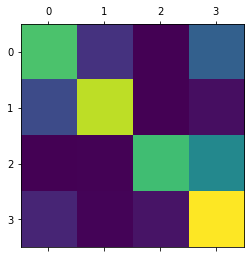

In [140]:

# Calculate the confusion matrix itself
confusion = metrics.confusion_matrix(test_y, pred_y)
print(f"Confusion matrix:\n{confusion}")

normalizedConfusion = np.array([])

# Normalizing by the true label counts to get rates
for row in confusion:
    normalizedConfusion = np.append( normalizedConfusion, row/row.sum())

normalizedConfusion = np.reshape(normalizedConfusion,(4,4))


print(f"\nNormalized confusion matrix:")
print(normalizedConfusion)

plt.matshow(normalizedConfusion)





In [141]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(train_X, train_y)
pred_y = classifier.predict(test_X)

In [142]:
pred_y

array(['Médio', 'Baixo', 'Alto', ..., 'Médio', 'Alto', 'Médio'],
      dtype=object)

In [143]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_y, pred_y))
print(classification_report(test_y, pred_y))

[[192  44   4 115]
 [ 71 177   3  31]
 [ 13   2 104  84]
 [ 99  23  80 507]]
              precision    recall  f1-score   support

        Alto       0.51      0.54      0.53       355
   Altíssimo       0.72      0.63      0.67       282
       Baixo       0.54      0.51      0.53       203
       Médio       0.69      0.72      0.70       709

    accuracy                           0.63      1549
   macro avg       0.62      0.60      0.61      1549
weighted avg       0.63      0.63      0.63      1549

